In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import xgboost as xgb
import os

In [2]:
from tqdm import tqdm
import time

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
dir_path = '/content/gdrive/My Drive/BTP/data'

In [5]:
def get_files(dir_path, filename):
    return pd.read_csv(os.path.join(dir_path, filename), sep='\t', header=None)

In [7]:
pressureFile5 = get_files(dir_path=dir_path, filename='PS5.txt')
pressureFile4 = get_files(dir_path=dir_path, filename='PS4.txt')
vibration1 = get_files(dir_path=dir_path, filename='VS1.txt')
volume1 = get_files(dir_path=dir_path, filename='FS1.txt')
volume2 = get_files(dir_path=dir_path, filename='FS2.txt')
temperature1 = get_files(dir_path=dir_path, filename='TS1.txt')
temperature4 = get_files(dir_path=dir_path, filename='TS4.txt')
effFactor = get_files(dir_path=dir_path, filename='SE.txt')

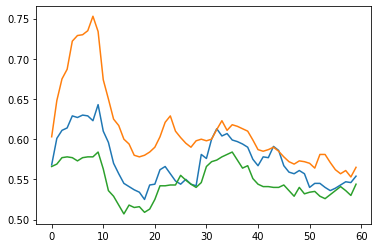

In [18]:
plt.plot(vibration1.iloc[5])
plt.plot(vibration1.iloc[733])
plt.plot(vibration1.iloc[2201])

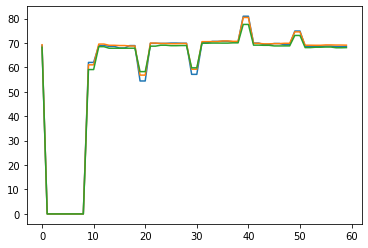

In [19]:
plt.plot(effFactor.iloc[5])
plt.plot(effFactor.iloc[733])
plt.plot(effFactor.iloc[2201])

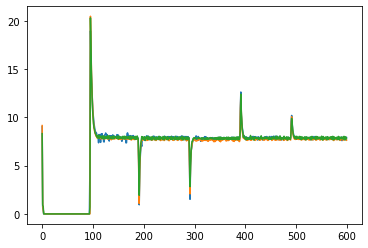

In [20]:
plt.plot(volume1.iloc[5])
plt.plot(volume1.iloc[733])
plt.plot(volume1.iloc[2201])

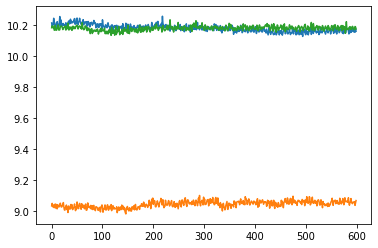

In [21]:
plt.plot(volume2.iloc[5])
plt.plot(volume2.iloc[733])
plt.plot(volume2.iloc[2201])

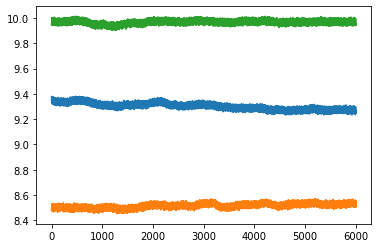

In [ ]:
plt.plot(pressureFile5.iloc[5]) # blue: 3: close to total failure
plt.plot(pressureFile5.iloc[733]) # orange : 20: reduced efficiency
plt.plot(pressureFile5.iloc[2201]) #green: 100: full efficiency

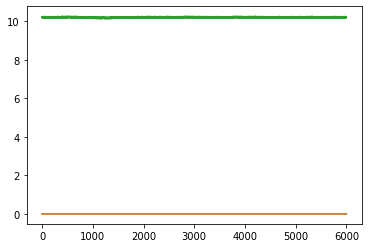

In [8]:
plt.plot(pressureFile4.iloc[5])
plt.plot(pressureFile4.iloc[733])
plt.plot(pressureFile4.iloc[2201])

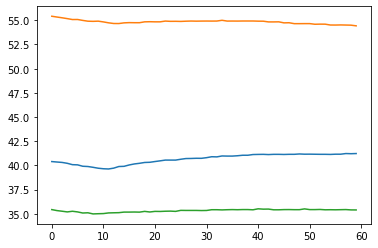

In [ ]:
plt.plot(temperature1.iloc[5])
plt.plot(temperature1.iloc[733])
plt.plot(temperature1.iloc[2201])

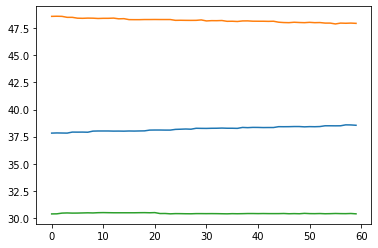

In [ ]:
plt.plot(temperature4.iloc[5])
plt.plot(temperature4.iloc[733])
plt.plot(temperature4.iloc[2201])

In [17]:
profile = get_files(dir_path=dir_path, filename='profile.txt')
y = pd.DataFrame(profile.iloc[:, 0])
y.head()
yc =y
yc.columns = ['yc']
yp=profile.iloc[:, 0]
yd= pd.concat([yc], axis=1)
yd.shape
yc

,yc
0,3
1,3
2,3
3,3
4,3
...,...
2200,100
2201,100
2202,100
2203,100


In [23]:
#average the cycle data

def mean_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.mean(axis = 1)
    return df1

In [25]:
PS5_mean = pd.DataFrame(mean_conversion(pressureFile5))
PS5_mean.columns = ['PS5_mean']

PS6_mean = pd.DataFrame(mean_conversion(pressureFile6))
PS6_mean.columns = ['PS6_mean']

FS1_mean = pd.DataFrame(mean_conversion(volume1))
FS1_mean.columns = ['FS1_mean']

FS2_mean = pd.DataFrame(mean_conversion(volume2))
FS2_mean.columns = ['FS2_mean']

VS1_mean = pd.DataFrame(mean_conversion(vibration1))
VS1_mean.columns = ['VS1_mean']

TS1_mean = pd.DataFrame(mean_conversion(temperature1))
TS1_mean.columns = ['TS1_mean']

TS4_mean = pd.DataFrame(mean_conversion(temperature4))
TS4_mean.columns = ['TS4_mean']

SE_mean = pd.DataFrame(mean_conversion(effFactor))
SE_mean.columns = ['SE_mean']

In [26]:
def std_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.std(axis = 1)
    return df1

In [27]:
PS5_std = pd.DataFrame(std_conversion(pressureFile5))
PS5_std.columns = ['PS5_std']

PS6_std = pd.DataFrame(std_conversion(pressureFile6))
PS6_std.columns = ['PS6_std']

FS1_std = pd.DataFrame(std_conversion(volume1))
FS1_std.columns = ['FS1_std']

FS2_std = pd.DataFrame(std_conversion(volume2))
FS2_std.columns = ['FS2_std']

VS1_std = pd.DataFrame(std_conversion(vibration1))
VS1_std.columns = ['VS1_std']

TS1_std = pd.DataFrame(std_conversion(temperature1))
TS1_std.columns = ['TS1_std']

TS4_std = pd.DataFrame(std_conversion(temperature4))
TS4_std.columns = ['TS4_std']

SE_std = pd.DataFrame(std_conversion(effFactor))
SE_std.columns = ['SE_std']

In [28]:
def max_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.max(axis = 1)
    return df1

In [29]:
PS5_max = pd.DataFrame(max_conversion(pressureFile5))
PS5_max.columns = ['PS5_max']

PS6_max = pd.DataFrame(max_conversion(pressureFile6))
PS6_max.columns = ['PS6_max']

FS1_max = pd.DataFrame(max_conversion(volume1))
FS1_max.columns = ['FS1_max']

FS2_max = pd.DataFrame(max_conversion(volume2))
FS2_max.columns = ['FS2_max']

VS1_max = pd.DataFrame(max_conversion(vibration1))
VS1_max.columns = ['VS1_max']

TS1_max = pd.DataFrame(max_conversion(temperature1))
TS1_max.columns = ['TS1_max']

TS4_max = pd.DataFrame(max_conversion(temperature4))
TS4_max.columns = ['TS4_max']

SE_max = pd.DataFrame(max_conversion(effFactor))
SE_max.columns = ['SE_max']

In [ ]:
def min_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.min(axis = 1)
    return df1

In [ ]:
PS2_min = pd.DataFrame(min_conversion(pressureFile2))
PS2_min.columns = ['PS2_min']

PS1_min = pd.DataFrame(min_conversion(pressureFile1))
PS1_min.columns = ['PS1_min']

PS3_min = pd.DataFrame(min_conversion(pressureFile3))
PS3_min.columns = ['PS3_min']

In [ ]:
def rms_conversion(df): 
    df1 = pd.DataFrame()
    df1 = ((np.power(df,2)).sum(axis=1))/df.count(axis=1)
    return df1

In [ ]:
PS2_rms = pd.DataFrame(rms_conversion(pressureFile2))
PS2_rms.columns = ['PS2_rms']

PS1_rms = pd.DataFrame(rms_conversion(pressureFile1))
PS1_rms.columns = ['PS1_rms']

PS3_rms = pd.DataFrame(rms_conversion(pressureFile3))
PS3_rms.columns = ['PS3_rms']

In [ ]:
def kurtosis_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.kurtosis(axis = 1)
    return df1

In [ ]:
PS2_kurtosis = pd.DataFrame(kurtosis_conversion(pressureFile2))
PS2_kurtosis.columns = ['PS2_kurtosis']

PS1_kurtosis = pd.DataFrame(kurtosis_conversion(pressureFile1))
PS1_kurtosis.columns = ['PS1_kurtosis']

PS3_kurtosis = pd.DataFrame(kurtosis_conversion(pressureFile3))
PS3_kurtosis.columns = ['PS3_kurtosis']

In [ ]:
def skew_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.skew(axis = 1)
    return df1

In [ ]:
PS2_skew = pd.DataFrame(skew_conversion(pressureFile2))
PS2_skew.columns = ['PS2_skew']

PS1_skew = pd.DataFrame(skew_conversion(pressureFile1))
PS1_skew.columns = ['PS1_skew']

PS3_skew = pd.DataFrame(skew_conversion(pressureFile3))
PS3_skew.columns = ['PS3_skew']

In [ ]:
def cre_conversion(df): 
    df1 = pd.DataFrame()
    df1 = (np.absolute(df.max(axis = 1)))/(((np.power(df,2)).sum(axis = 1))/df.count(axis = 1))
    return df1

In [ ]:
PS2_cre = pd.DataFrame(cre_conversion(pressureFile2))
PS2_cre.columns = ['PS2_cre']

PS1_cre = pd.DataFrame(cre_conversion(pressureFile1))
PS1_cre.columns = ['PS1_cre']

PS3_cre = pd.DataFrame(cre_conversion(pressureFile3))
PS3_cre.columns = ['PS3_cre']

In [ ]:
def cle_conversion(df): 
    df1 = pd.DataFrame()
    df1 = ((np.absolute(df)).max(axis = 1))/np.power((((np.power((np.absolute(df)),0.5)).sum(axis = 1))/df.count(axis = 1)),2)
    return df1

In [ ]:
PS2_cle = pd.DataFrame(cle_conversion(pressureFile2))
PS2_cle.columns = ['PS2_cle']

PS1_cle = pd.DataFrame(std_conversion(pressureFile1))
PS1_cle.columns = ['PS1_cle']

PS3_cle = pd.DataFrame(cle_conversion(pressureFile3))
PS3_cle.columns = ['PS3_cle']

In [ ]:
def sha_conversion(df): 
    df1 = pd.DataFrame()
    df1 = ( np.power( ( (( np.power(df,2) ).sum(axis = 1)) /df.count(axis = 1)) ,2)) /df.mean(axis = 1)
    return df1

In [ ]:
PS2_sha = pd.DataFrame(sha_conversion(pressureFile2))
PS2_sha.columns = ['PS2_sha']

PS1_sha = pd.DataFrame(sha_conversion(pressureFile1))
PS1_sha.columns = ['PS1_sha']

PS3_sha = pd.DataFrame(sha_conversion(pressureFile3))
PS3_sha.columns = ['PS3_sha']

In [ ]:
def imp_conversion(df): 
    df1 = pd.DataFrame()
    a= (np.absolute(df)).max(axis = 1)
    b = ( (np.absolute(df)).sum(axis = 1) ) / (df.count(axis = 1))
    df1 = a / b
    return df1

In [ ]:
PS2_imp = pd.DataFrame(imp_conversion(pressureFile2))
PS2_imp.columns = ['PS2_imp']

PS1_imp = pd.DataFrame(imp_conversion(pressureFile1))
PS1_imp.columns = ['PS1_imp']

PS3_imp = pd.DataFrame(imp_conversion(pressureFile3))
PS3_imp.columns = ['PS3_imp']

In [ ]:
from scipy import pi
from scipy.fftpack import fft

In [ ]:
freq_data = fft(pressureFile5)
freq_data = pd.DataFrame(freq_data)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


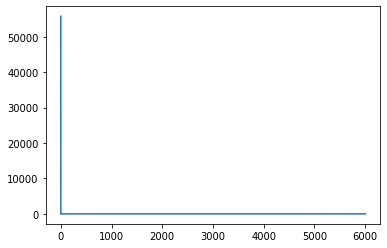

In [ ]:
plt.plot(freq_data.iloc[5])
#plt.plot(freq_data.iloc[733])
#plt.plot(freq_data.iloc[2201])

In [ ]:
PS1 = pd.concat([PS1_mean, PS1_max, PS1_min, PS1_skew, PS1_kurtosis, PS1_std, PS1_rms,PS1_imp, PS1_sha, PS1_cre, PS1_cle], axis=1)

In [ ]:
PS2 = pd.concat([PS2_mean, PS2_max, PS2_min, PS2_skew, PS2_kurtosis, PS2_std, PS2_rms,PS2_imp, PS2_sha, PS2_cre, PS2_cle], axis=1)

In [ ]:
PS3 = pd.concat([PS3_mean, PS3_max, PS3_min, PS3_skew, PS3_kurtosis, PS3_std, PS3_rms, PS3_imp, PS3_sha, PS3_cre, PS3_cle], axis=1)

In [ ]:
X_cooler= pd.concat([PS5_mean, PS6_mean, TS1, TS2, TS4], axis=1)

In [ ]:
X_normalize = pd.DataFrame(StandardScaler().fit_transform(X_cooler))

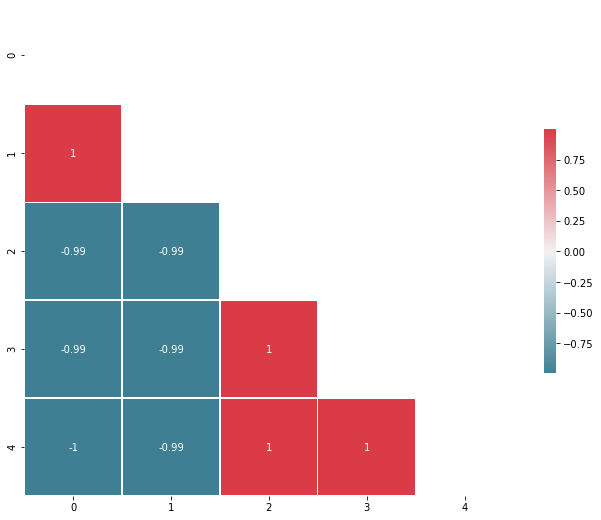

In [ ]:
corr_matrix = X_normalize.corr()

#plot heat map for correlation matrix (from https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot= True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

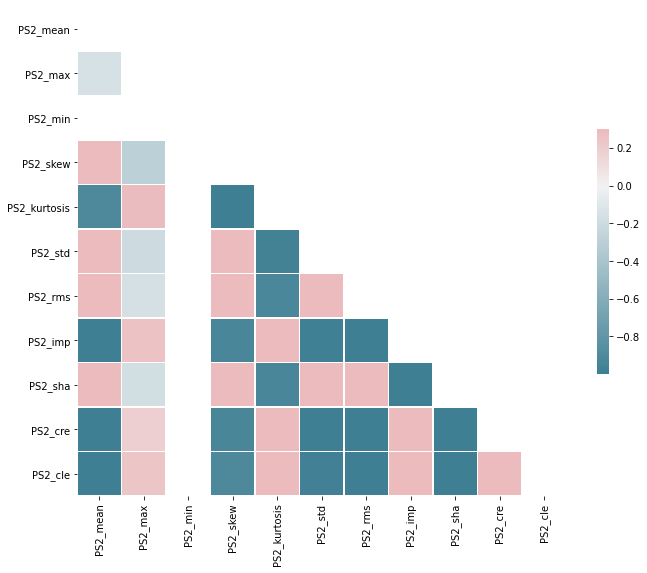

In [ ]:
*+-+*corr_matrix = PS2.corr()

#plot heat map for correlation matrix (from https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

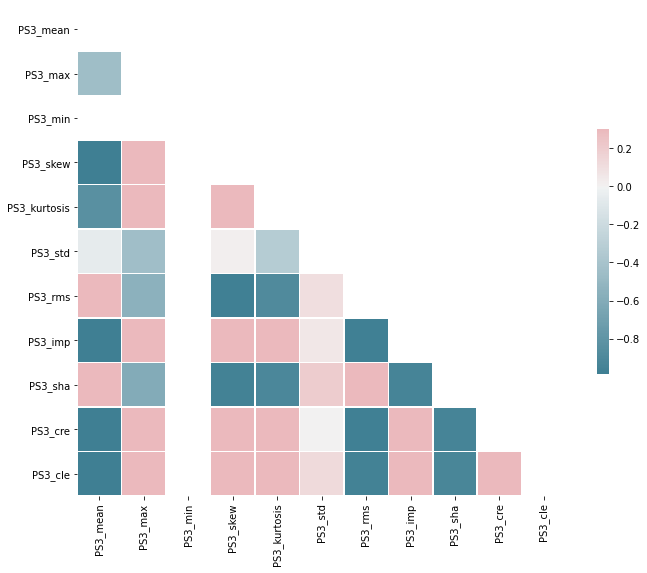

In [ ]:
corr_matrix = PS3.corr()

#plot heat map for correlation matrix (from https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [ ]:
PS1.count()
y.count()

yc    2205
dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


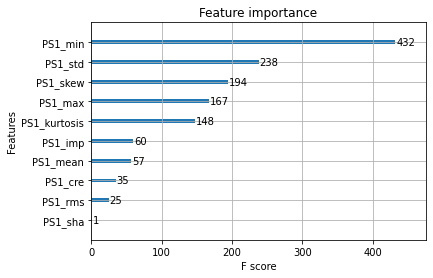

In [ ]:
model = XGBClassifier()
model.fit(PS1, y)
    # plot feature importance
plot_importance(model)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


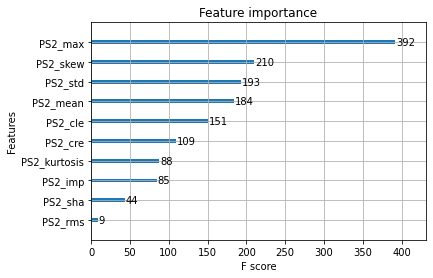

In [ ]:
model = XGBClassifier()
model.fit(PS2, y)
    # plot feature importance
plot_importance(model)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


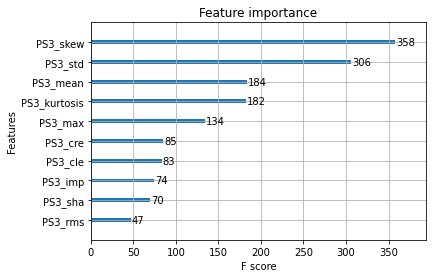

In [ ]:
model = XGBClassifier()
model.fit(PS3, y)
    # plot feature importance
plot_importance(model)
pyplot.show()

In [ ]:
X = pd.concat([PS1_min, PS1_std, PS1_skew, PS1_max, PS1_kurtosis, PS1_imp, PS2_max, PS2_skew, PS2_std, PS2_mean, PS2_cle, PS2_cre, PS3_skew, PS3_std, PS3_mean, PS3_kurtosis, PS3_max, PS3_cre], axis=1)

In [ ]:
X.head()

,PS1_min,PS1_std,PS1_skew,PS1_max,PS1_kurtosis,PS1_imp,PS2_max,PS2_skew,PS2_std,PS2_mean,PS2_cle,PS2_cre,PS3_skew,PS3_std,PS3_mean,PS3_kurtosis,PS3_max,PS3_cre
0,145.83,13.939309,1.273366,191.51,0.496980,1.191920,156.99,-1.838312,47.114508,109.466914,1.687403,0.011054,-0.373672,0.945705,1.991475,6.528605,10.039,2.065560
1,145.73,14.118967,1.279010,191.47,0.461558,1.192192,157.56,-1.838811,47.045611,109.354890,1.694697,0.011118,-0.312892,0.941967,1.976234,6.956540,9.992,2.084856
2,145.37,14.192619,1.283171,191.41,0.465522,1.193718,156.97,-1.838005,46.992060,109.158845,1.693061,0.011114,-0.196072,0.943501,1.972224,8.221051,10.914,2.283401
3,145.14,14.227803,1.286675,191.34,0.472033,1.194471,156.44,-1.837580,46.972221,109.064807,1.691038,0.011094,-0.166242,0.935534,1.946575,7.890923,10.297,2.207651
4,144.95,14.276434,1.292638,191.41,0.483247,1.196309,158.13,-1.837956,46.874946,108.931434,1.708689,0.011244,0.017996,0.930335,1.922707,9.740375,11.102,2.433485


In [ ]:
X.describe()

,PS1_min,PS1_std,PS1_skew,PS1_max,PS1_kurtosis,PS1_imp,PS2_max,PS2_skew,PS2_std,PS2_mean,PS2_cle,PS2_cre,PS3_skew,PS3_std,PS3_mean,PS3_kurtosis,PS3_max,PS3_cre
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,143.472866,15.296219,1.107230,190.904694,0.314235,1.190537,166.520517,-1.775892,47.736162,109.379906,1.802563,0.011766,0.481575,0.899336,1.753227,11.957971,10.410176,2.811169
std,2.196514,2.068116,0.625019,0.602970,0.643898,0.033963,0.977997,0.140184,3.271949,4.986585,0.072957,0.000996,1.041079,0.039781,0.251902,5.148080,0.639825,0.911485
min,133.130000,13.927662,-1.778805,189.630000,-1.923034,1.050691,155.040000,-1.842803,45.206954,104.406307,1.494723,0.007987,-0.689637,0.728504,0.840252,4.869534,9.109000,1.904474
25%,141.230000,14.144613,1.285336,190.460000,0.452323,1.190833,166.180000,-1.835938,46.209665,106.962382,1.801764,0.011780,-0.365624,0.868688,1.729733,6.604399,9.766000,2.104418
50%,143.310000,14.730968,1.315239,190.960000,0.507458,1.202127,166.650000,-1.830345,46.805986,107.730169,1.826080,0.012108,0.299237,0.887461,1.779631,11.917579,10.562000,2.735167
75%,145.910000,15.050131,1.341660,191.390000,0.580497,1.207282,167.100000,-1.806784,47.207567,109.421612,1.839864,0.012240,0.852258,0.933554,1.932047,15.325977,10.812000,2.931521
max,146.690000,22.141793,1.433800,191.920000,1.238362,1.221238,167.770000,-1.317933,59.553248,131.589089,1.882513,0.012720,4.191253,1.049323,2.023398,39.652188,18.828000,8.333381


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=18, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=150, batch_size=1500)